## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.122824  1.009532 -0.247065 -0.710396  0.014619 -0.239874
1 -1.638025  1.097621 -1.035345 -1.428043 -0.934014 -1.768110
2  0.366299  1.224282  1.471322  1.488180  1.543093  2.432805
3 -1.117014  1.554933  0.694996 -1.388289 -0.048245 -1.034474
4 -1.344809  1.219294 -0.405546  1.340131 -0.441395  0.060292


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0110507	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0007174	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9913444	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9794945	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9702360	total: 60.3ms	remaining: 12s
5:	learn: 0.9602012	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9495628	total: 61.3ms	remaining: 8.7s
7:	learn: 0.9395835	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9317267	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9227832	total: 63ms	remaining: 6.23s
10:	learn: 0.9148045	total: 63.5ms	remaining: 5.71s
11:	learn: 0.9043784	total: 64.1ms	remaining: 5.27s
12:	learn: 0.8949243	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8874611	total: 65.1ms	remaining: 4.58s
14:	learn: 0.8798961	total: 65.6ms	remaining: 4.31s
15:	learn: 0.8722408	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8637608	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8549244	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8472690	total: 67ms	remaining: 3.46s

111:	learn: 0.3879256	total: 108ms	remaining: 859ms
112:	learn: 0.3846932	total: 109ms	remaining: 856ms
113:	learn: 0.3820589	total: 110ms	remaining: 851ms
114:	learn: 0.3795348	total: 110ms	remaining: 846ms
115:	learn: 0.3768752	total: 110ms	remaining: 841ms
116:	learn: 0.3738603	total: 111ms	remaining: 837ms
117:	learn: 0.3715335	total: 111ms	remaining: 832ms
118:	learn: 0.3690873	total: 112ms	remaining: 828ms
119:	learn: 0.3664615	total: 112ms	remaining: 823ms
120:	learn: 0.3635778	total: 113ms	remaining: 819ms
121:	learn: 0.3602342	total: 113ms	remaining: 816ms
122:	learn: 0.3581086	total: 114ms	remaining: 812ms
123:	learn: 0.3553349	total: 114ms	remaining: 808ms
124:	learn: 0.3530745	total: 115ms	remaining: 804ms
125:	learn: 0.3507392	total: 115ms	remaining: 801ms
126:	learn: 0.3481350	total: 116ms	remaining: 797ms
127:	learn: 0.3456803	total: 116ms	remaining: 792ms
128:	learn: 0.3432265	total: 117ms	remaining: 788ms
129:	learn: 0.3409510	total: 117ms	remaining: 784ms
130:	learn: 

275:	learn: 0.1274071	total: 187ms	remaining: 489ms
276:	learn: 0.1264679	total: 187ms	remaining: 489ms
277:	learn: 0.1253876	total: 188ms	remaining: 488ms
278:	learn: 0.1245884	total: 188ms	remaining: 487ms
279:	learn: 0.1238005	total: 189ms	remaining: 486ms
280:	learn: 0.1230449	total: 189ms	remaining: 485ms
281:	learn: 0.1223336	total: 190ms	remaining: 484ms
282:	learn: 0.1212518	total: 190ms	remaining: 483ms
283:	learn: 0.1202924	total: 191ms	remaining: 481ms
284:	learn: 0.1196156	total: 192ms	remaining: 481ms
285:	learn: 0.1189670	total: 192ms	remaining: 480ms
286:	learn: 0.1183199	total: 193ms	remaining: 478ms
287:	learn: 0.1174818	total: 193ms	remaining: 477ms
288:	learn: 0.1167429	total: 194ms	remaining: 476ms
289:	learn: 0.1162365	total: 194ms	remaining: 475ms
290:	learn: 0.1155852	total: 194ms	remaining: 474ms
291:	learn: 0.1147297	total: 195ms	remaining: 472ms
292:	learn: 0.1140147	total: 196ms	remaining: 472ms
293:	learn: 0.1133151	total: 196ms	remaining: 471ms
294:	learn: 

495:	learn: 0.0397442	total: 292ms	remaining: 297ms
496:	learn: 0.0394472	total: 292ms	remaining: 296ms
497:	learn: 0.0392445	total: 293ms	remaining: 295ms
498:	learn: 0.0391397	total: 293ms	remaining: 295ms
499:	learn: 0.0389412	total: 294ms	remaining: 294ms
500:	learn: 0.0388543	total: 294ms	remaining: 293ms
501:	learn: 0.0385682	total: 295ms	remaining: 292ms
502:	learn: 0.0383745	total: 295ms	remaining: 292ms
503:	learn: 0.0382740	total: 295ms	remaining: 291ms
504:	learn: 0.0380477	total: 296ms	remaining: 290ms
505:	learn: 0.0379344	total: 296ms	remaining: 289ms
506:	learn: 0.0377571	total: 297ms	remaining: 289ms
507:	learn: 0.0375830	total: 297ms	remaining: 288ms
508:	learn: 0.0374171	total: 298ms	remaining: 287ms
509:	learn: 0.0371491	total: 298ms	remaining: 286ms
510:	learn: 0.0369804	total: 299ms	remaining: 286ms
511:	learn: 0.0368147	total: 299ms	remaining: 285ms
512:	learn: 0.0365869	total: 299ms	remaining: 284ms
513:	learn: 0.0364812	total: 300ms	remaining: 284ms
514:	learn: 

661:	learn: 0.0210742	total: 370ms	remaining: 189ms
662:	learn: 0.0210498	total: 371ms	remaining: 189ms
663:	learn: 0.0210282	total: 371ms	remaining: 188ms
664:	learn: 0.0209274	total: 372ms	remaining: 187ms
665:	learn: 0.0208502	total: 372ms	remaining: 187ms
666:	learn: 0.0208197	total: 373ms	remaining: 186ms
667:	learn: 0.0207901	total: 373ms	remaining: 185ms
668:	learn: 0.0207138	total: 374ms	remaining: 185ms
669:	learn: 0.0206931	total: 374ms	remaining: 184ms
670:	learn: 0.0206633	total: 375ms	remaining: 184ms
671:	learn: 0.0206344	total: 375ms	remaining: 183ms
672:	learn: 0.0206139	total: 376ms	remaining: 182ms
673:	learn: 0.0205848	total: 376ms	remaining: 182ms
674:	learn: 0.0205252	total: 377ms	remaining: 181ms
675:	learn: 0.0205052	total: 377ms	remaining: 181ms
676:	learn: 0.0203632	total: 378ms	remaining: 180ms
677:	learn: 0.0203059	total: 378ms	remaining: 180ms
678:	learn: 0.0202101	total: 379ms	remaining: 179ms
679:	learn: 0.0200723	total: 379ms	remaining: 178ms
680:	learn: 

878:	learn: 0.0114680	total: 476ms	remaining: 65.5ms
879:	learn: 0.0114610	total: 476ms	remaining: 64.9ms
880:	learn: 0.0114214	total: 477ms	remaining: 64.4ms
881:	learn: 0.0113876	total: 477ms	remaining: 63.8ms
882:	learn: 0.0113367	total: 478ms	remaining: 63.3ms
883:	learn: 0.0112628	total: 478ms	remaining: 62.8ms
884:	learn: 0.0112487	total: 479ms	remaining: 62.2ms
885:	learn: 0.0112348	total: 479ms	remaining: 61.6ms
886:	learn: 0.0112189	total: 480ms	remaining: 61.1ms
887:	learn: 0.0111680	total: 480ms	remaining: 60.5ms
888:	learn: 0.0111499	total: 480ms	remaining: 60ms
889:	learn: 0.0111178	total: 481ms	remaining: 59.4ms
890:	learn: 0.0111022	total: 481ms	remaining: 58.9ms
891:	learn: 0.0110532	total: 482ms	remaining: 58.4ms
892:	learn: 0.0110396	total: 483ms	remaining: 57.8ms
893:	learn: 0.0110086	total: 483ms	remaining: 57.3ms
894:	learn: 0.0109813	total: 483ms	remaining: 56.7ms
895:	learn: 0.0109312	total: 484ms	remaining: 56.2ms
896:	learn: 0.0108941	total: 484ms	remaining: 55

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

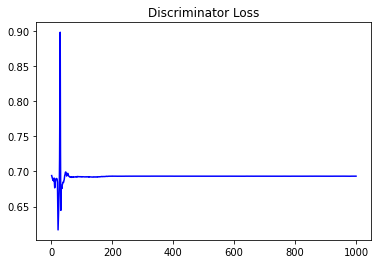

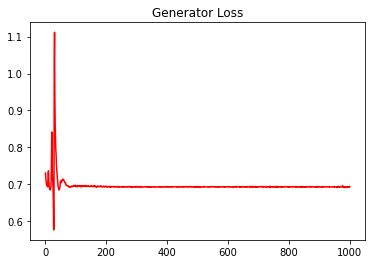

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13723276853822008


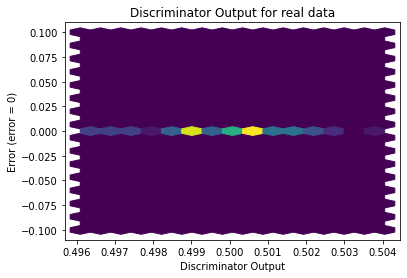

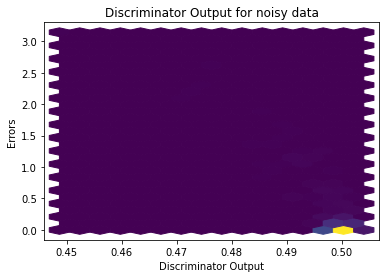

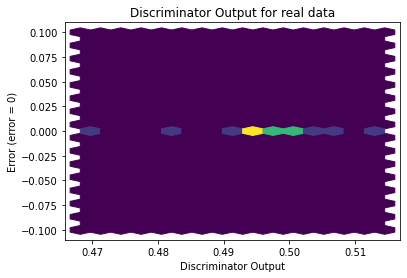

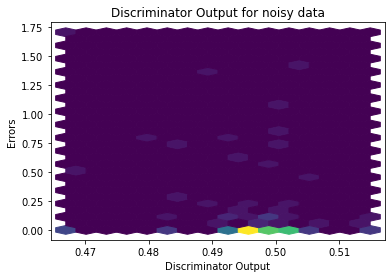

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


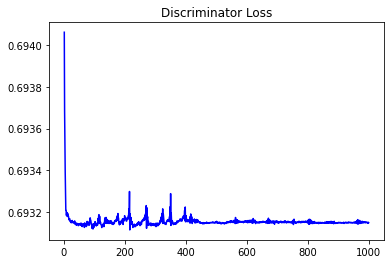

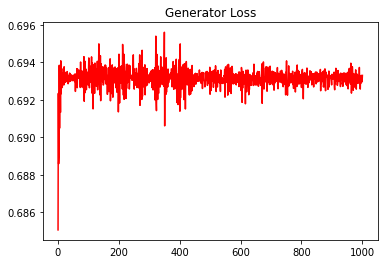

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1388786256660833


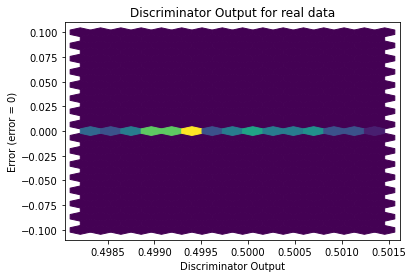

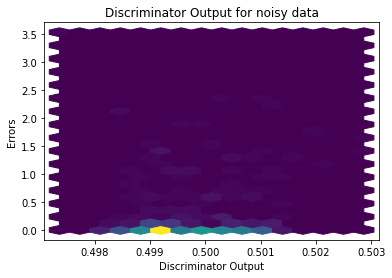

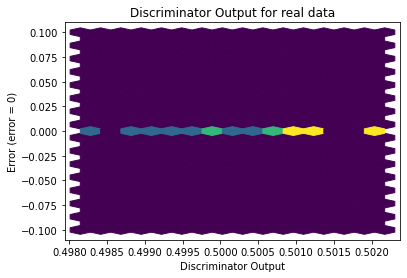

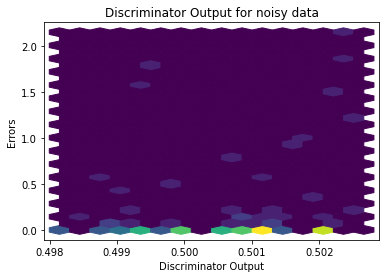

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0216]], requires_grad=True)
